In [1]:
# Dependencies
import json
import requests
from config import api_key
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from citipy import citipy
import random as random
import numpy as np
import gmaps
from config import gkey
import os


In [2]:

#Loading csv file
csv_file = "cities.csv"
#DataFrame
weather_data_df = pd.read_csv(csv_file)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="


weather_data_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [3]:
print(requests.get(url))
print(requests.get(url).json())


<Response [401]>
{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}


In [4]:
# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

#List holdings
lat_lngs = []
lat_lngs_list = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#random generator
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Counts
count = 0
number = 1

#Loop
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        lat_lngs_list.append(lat_lng)
len(cities)

589

In [5]:
#Create dataframe with list of cities
df = pd.DataFrame(cities)
df = df.rename(columns={0: 'city'})
df['lat_lngs'] = lat_lngs_list
df




,city,lat_lngs
0,port elizabeth,"(-55.16907636823593, 31.162939023310287)"
1,souillac,"(-60.62512122222894, 77.88948270274989)"
2,brae,"(68.85784957195071, -1.0934722189695378)"
3,partyzany,"(46.43556809594884, 34.56798296276665)"
4,tuktoyaktuk,"(78.07625440657495, -128.41289714148002)"
...,...,...
584,bilma,"(17.257387583240202, 12.55148766047742)"
585,nevsehir,"(38.532554602914814, 34.47504475044411)"
586,doha,"(29.14856770346077, 47.29534602678595)"
587,chagda,"(57.372312532986655, 132.35722479663167)"


In [6]:
#Create list holds
temp = []
max_temp = []
humidity = []
wind_speed = []
clouds = []



In [7]:

for index, row in df.iterrows():
    city = row['city']
    print(f"Processing City Records {index + 1} : {city}")
    
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + api_key
    response = requests.get(target_url).json()
try:
        temp.append(response['main']['temp']) 
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])

except:
        print("City not found")
        pass
print("----------------------")
print("Complete")  

df["Temperature"]=temp
df["Max Temperature"]=max_temp
df["Humidity"]=humidity
df["Clouds"]=clouds
df["Wind Speed"]=wind

Processing City Records 1 : port elizabeth
Processing City Records 2 : souillac
Processing City Records 3 : brae
Processing City Records 4 : partyzany
Processing City Records 5 : tuktoyaktuk
Processing City Records 6 : khatanga
Processing City Records 7 : tapaua
Processing City Records 8 : tabou
Processing City Records 9 : mogadishu
Processing City Records 10 : bethel
Processing City Records 11 : acarau
Processing City Records 12 : sitio novo do tocantins
Processing City Records 13 : galgani
Processing City Records 14 : maneadero
Processing City Records 15 : tabiauea
Processing City Records 16 : vardo
Processing City Records 17 : vaini
Processing City Records 18 : barentsburg
Processing City Records 19 : raudeberg
Processing City Records 20 : bluff
Processing City Records 21 : busselton
Processing City Records 22 : pevek
Processing City Records 23 : tsihombe
Processing City Records 24 : micheweni
Processing City Records 25 : rikitea
Processing City Records 26 : nantucket
Processing Cit

Processing City Records 212 : sumbe
Processing City Records 213 : nsanje
Processing City Records 214 : lisala
Processing City Records 215 : komsomolets
Processing City Records 216 : mullaitivu
Processing City Records 217 : cabedelo
Processing City Records 218 : bosanski brod
Processing City Records 219 : nhulunbuy
Processing City Records 220 : swan hill
Processing City Records 221 : bedele
Processing City Records 222 : kutum
Processing City Records 223 : muros
Processing City Records 224 : chuy
Processing City Records 225 : lima
Processing City Records 226 : douglas
Processing City Records 227 : arlit
Processing City Records 228 : chapais
Processing City Records 229 : vaitupu
Processing City Records 230 : sao filipe
Processing City Records 231 : hargeysa
Processing City Records 232 : hamilton
Processing City Records 233 : dikson
Processing City Records 234 : cidreira
Processing City Records 235 : arvika
Processing City Records 236 : verkhoyansk
Processing City Records 237 : russell
Pro

Processing City Records 419 : nea karia
Processing City Records 420 : pawayan
Processing City Records 421 : la asuncion
Processing City Records 422 : ilulissat
Processing City Records 423 : pinega
Processing City Records 424 : kailua
Processing City Records 425 : jiexiu
Processing City Records 426 : hella
Processing City Records 427 : vila velha
Processing City Records 428 : turayf
Processing City Records 429 : binzhou
Processing City Records 430 : lunenburg
Processing City Records 431 : linhares
Processing City Records 432 : itarantim
Processing City Records 433 : kaitangata
Processing City Records 434 : tabuk
Processing City Records 435 : conde
Processing City Records 436 : eirunepe
Processing City Records 437 : kandrian
Processing City Records 438 : great yarmouth
Processing City Records 439 : aracaju
Processing City Records 440 : gat
Processing City Records 441 : znamenskoye
Processing City Records 442 : buncrana
Processing City Records 443 : newala
Processing City Records 444 : ga

ValueError: Length of values does not match length of index

In [8]:
weather_dictionary = {"City":city,
    "Cloudiness":cloudiness,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed}


NameError: name 'cloudiness' is not defined

In [9]:
updated_weather_df = pd.DataFrame(weather_dictionary)

NameError: name 'weather_dictionary' is not defined

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

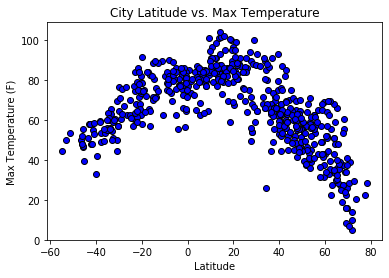

In [10]:
#Scatterplot Temperature (F) vs. Latitude
latitude = weather_data_df["Lat"]
max_temperature = weather_data_df["Max Temp"]
plt.scatter(latitude, max_temperature,facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")


In [11]:
#The plot shows that the higher temperatures occurs the closer the latitude moves towards zero

Text(0.5, 1.0, 'Humidity % vs Latitude')

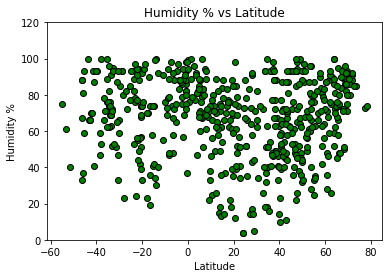

In [12]:
#Scatterplot Humidity (%) vs. Latitude
humidity = weather_data_df["Humidity"]
plt.scatter(latitude, humidity,facecolors="green", edgecolors="black")
plt.ylim(0,120)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity % vs Latitude")

In [13]:
#The plot shows that the lowest percentage of humidity occurs from 0-40 degrees latitude 

Text(0.5, 1.0, 'Cloudiness vs Latitude')

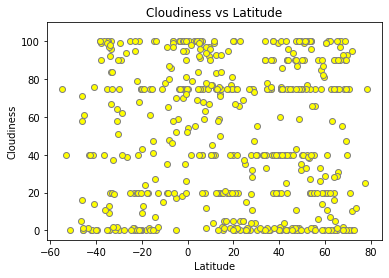

In [14]:
#Scatterplot Cloudiness (%) vs. Latitude
cloudiness = weather_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, facecolors="yellow", edgecolors="grey")
plt.ylim(-5, 110)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude")

In [15]:
#The plot shows that cloud coverage is spread out throughout the latitudes, however tends to have less cloudiness the higher the latitude is.

Text(0.5, 1.0, 'Wind Speed vs Latitude')

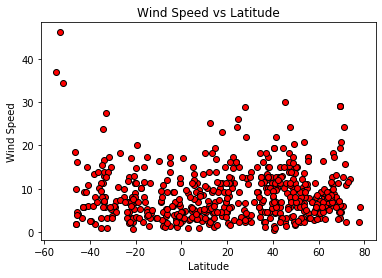

In [16]:
#Scatterplot Wind Speed (mph) vs. Latitude
wind_speed = weather_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, facecolors="red", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude")

In [17]:
#The plot shows that besides a few outliers, wind speed are evenly spread out across different latitudes of the world

In [18]:
new_weather_df = weather_data_df



In [19]:
northern_hemi = new_weather_df.loc[(new_weather_df["Lat"] > 0)]
southern_hemi = new_weather_df.loc[(new_weather_df["Lat"] < 0)]
northern_hemi.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93


In [20]:
north_temp = northern_hemi["Max Temp"]
north_lat = northern_hemi["Lat"]

In [21]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_temp, north_lat)

# Get regression values
regress_values = north_temp * slope + intercept
print(regress_values)

0      59.466215
2      71.858599
3      53.715501
8      78.419272
9      37.159925
         ...    
543    24.556953
544    21.641098
545    40.432163
546    49.552309
547    44.595355
Name: Max Temp, Length: 380, dtype: float64


In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.81x +89.84


The r-squared is: -0.8151657406810829


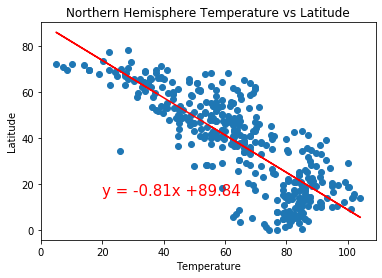

In [23]:
# Create Plot
plt.scatter(north_temp,north_lat)
plt.plot(north_temp,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere Temperature vs Latitude")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [24]:
#The graph shows a negative correlation, with the lower the latitude, the higher the temperature. 

In [25]:
south_temp = southern_hemi["Max Temp"]
south_lat = southern_hemi["Lat"]

In [26]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_temp, south_lat)

# Get regression values
regress_values = south_temp * slope + intercept
print(regress_values)

1     -12.731843
4     -32.029822
5     -10.058384
6     -28.628775
7     -18.434095
         ...    
526   -29.855521
531   -37.097550
536   -10.667526
539   -12.799526
541   -41.666120
Name: Max Temp, Length: 168, dtype: float64


In [27]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.85x +-79.4


The r-squared is: 0.7602633550516462


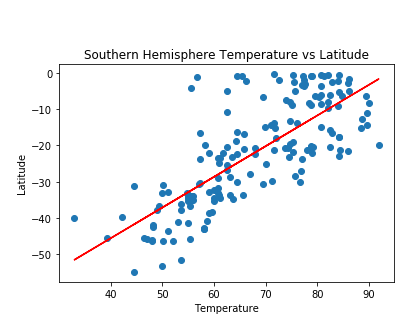

In [28]:
# Create Plot
plt.scatter(south_temp,south_lat)
plt.plot(south_temp,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Temperature vs Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [29]:
#The grpah shows a positive correlation with the closer the latitude is to zero, the higher the temperature is. 

In [30]:
north_humid = northern_hemi["Humidity"]


In [31]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_humid, north_lat)

# Get regression values
regress_values = north_humid * slope + intercept
print(regress_values)
   

0      38.823749
2      38.919349
3      35.668965
8      40.353342
9      38.632550
         ...    
543    34.999768
544    32.322982
545    37.867754
546    40.831339
547    38.058953
Name: Humidity, Length: 380, dtype: float64


In [32]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.1x +31.94


The r-squared is: 0.10358336015746496


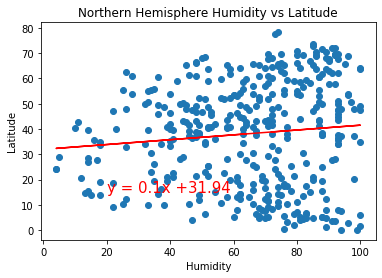

In [33]:
# Create Plot
plt.scatter(north_humid,north_lat)
plt.plot(north_humid,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [35]:
#THe graph shows a slight positive correlation

In [36]:
south_humid = southern_hemi["Humidity"]

In [37]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_humid, south_lat)

# Get regression values
regress_values = south_humid * slope + intercept
print(regress_values)

1     -22.137319
4     -21.975270
5     -21.975270
6     -23.109613
7     -26.269568
         ...    
526   -24.811127
531   -22.380393
536   -21.489123
539   -21.651172
541   -21.084001
Name: Humidity, Length: 168, dtype: float64


In [38]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.08x +-28.13


The r-squared is: 0.14689473425583074


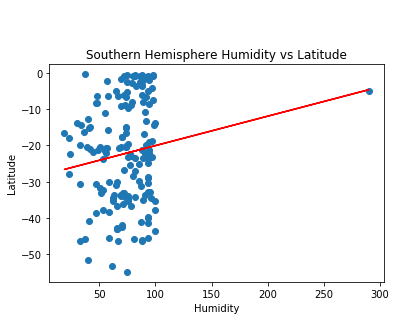

In [39]:
# Create Plot
plt.scatter(south_humid,south_lat)
plt.plot(south_humid,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [40]:
#The graph shows a positive correlation

In [41]:
north_clouds = northern_hemi["Cloudiness"]

In [42]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_clouds, north_lat)

# Get regression values
regress_values = north_clouds * slope + intercept
print(regress_values)
   

0      40.530704
2      39.398655
3      40.629143
8      35.953290
9      40.333826
         ...    
543    40.629143
544    40.383045
545    40.629143
546    35.707193
547    40.432265
Name: Cloudiness, Length: 380, dtype: float64


In [43]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.05x +40.63


The r-squared is: -0.08733547918934018


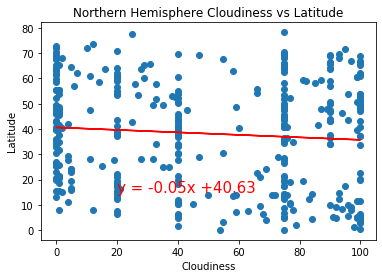

In [44]:
# Create Plot
plt.scatter(north_clouds,north_lat)
plt.plot(north_clouds,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Cloudiness vs Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [45]:
#The graph shows a slight negative correlation, with cloudiness being spread out over the latitude lines 

In [46]:
south_clouds = southern_hemi["Cloudiness"]

In [47]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_clouds, south_lat)

# Get regression values
regress_values = south_clouds * slope + intercept
print(regress_values)
   

1     -19.970252
4     -24.482916
5     -19.724107
6     -26.123885
7     -26.123885
         ...    
526   -24.975207
531   -19.970252
536   -17.919041
539   -20.216398
541   -20.872785
Name: Cloudiness, Length: 168, dtype: float64


In [48]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.08x +-26.12


The r-squared is: 0.21881426893991604


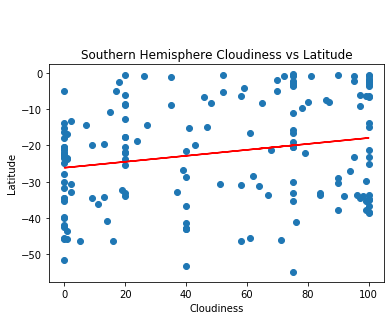

In [49]:
# Create Plot
plt.scatter(south_clouds,south_lat)
plt.plot(south_clouds,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [51]:
#The graph shows a slight positive correlation, as with the northern hemisphere graph, showing cloud coverage spread out over
#the latitude lines

In [52]:
north_winds = northern_hemi["Wind Speed"]

In [53]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_winds, north_lat)

# Get regression values
regress_values = north_winds * slope + intercept
print(regress_values)
   

0      37.480065
2      35.585219
3      36.415945
8      40.858350
9      37.389081
         ...    
543    37.832135
544    41.020539
545    37.832135
546    35.707850
547    35.771144
Name: Wind Speed, Length: 380, dtype: float64


In [54]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.4x +34.65


The r-squared is: 0.10713827743884798


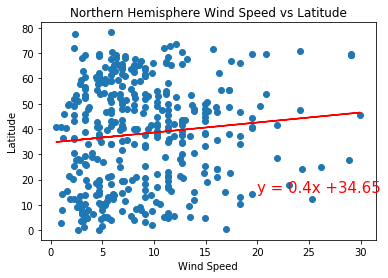

In [55]:
# Create Plot
plt.scatter(north_winds,north_lat)
plt.plot(north_winds,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Wind Speed vs Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [57]:
#The graph shows a slight positive correlation with a few ouliers of wind speed. 

In [58]:
south_winds = southern_hemi["Wind Speed"]

In [59]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_winds, south_lat)

# Get regression values
regress_values = south_winds * slope + intercept
print(regress_values)
   

1     -24.482312
4     -22.102674
5     -28.080099
6     -24.482312
7     -20.254205
         ...    
526   -24.177775
531   -25.431334
536   -21.819383
539   -19.113961
541   -20.523330
Name: Wind Speed, Length: 168, dtype: float64


In [60]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.71x +-16.4


The r-squared is: -0.3224830771395381


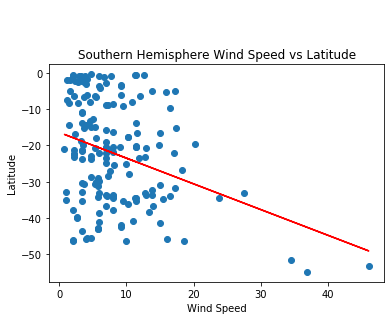

In [61]:
# Create Plot
plt.scatter(south_winds,south_lat)
plt.plot(south_winds,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [ ]:
#The graph shows a negative correlation, with the trend of wind speed picking up the lower the latitude is. 